# PROBLEMA DE TRANSPORTE

O problema de transporte (_Transportation Problem_) consiste em um conjunto de $m$ fábricas que produzem um produto, onde cada fábrica $i$ pode fornecer, no máximo $s_i$ unidades. Um conjunto de $n$ clientes para os quais o produto deve ser transportado, onde cada cliente $j$ deve receber pelo menos $d_j$ unidades do produto. Cada unidade produzida na fábrica $i$ e transportada ao cliente $j$ tem um custo de $c_{ij}$.

O objetivo é minimizar os custos de transporte. O modelo abstrato de programação linear para este tipo de problema é dado como:

$$
\text{Min } z = \sum_{i=1}^{m} \sum_{j=1}^{n} c_{ij}x_{ij}\\
$$

$$
\begin{equation}
  \begin{array}{rlll}
    \text{Sujeito a: } & & \\
    & \sum_{j=1}^{n} x_{ij} \le s_{i} & , \forall \ i=1,...,m & (1) \\
    & \sum_{i=1}^{m} x_{ij} \ge d_{j} & , \forall \ j=1,...,n & (2) \\
    & x \ge 0 & & (3)
  \end{array}
\end{equation}
$$

Onde:

- $x_{ij}$ são a quantidade de produtos enviadas do ofertante $i$ para o cliente $j$; 
- $c$ contém o custo de transporte da unidade da fábrica $i$ para o cliente $j$;
- $s$ contém a capacidade máxima de cada fábrica;
- $d$ contém a demanda de cada cliente;
- O conjunto de restrições $(1)$ garante que a quantidade de produtos despachadas por cada ofertante não seja maior do que sua respectiva oferta;
- O conjunto $(2)$ garante que a quantidade de produtos que cada cliente receber deva atender a demanda de cada um deles;
- A restrição $(3)$ garante a não negatividade das variáveis.

# Instância do Problema

> Uma empresa possui três fábricas que produzem carrinhos de bebê que devem ser remetidos para quatro centros de distribuição. As Fábricas F1, F2 e F3 produzem, respectivamente, 12, 17 e 11 remessas por mês. Cada centro de distribuição CD precisa receber dez remessas por mês. Com base na tabela de custos abaixo, que mostra o custo unitário de transporte das Fábricas à cada CD, quanto deve ser remetido de cada fábrica para cada um dos centros de distribuição para minimizar o custo total de transporte?

<center>

|Fábrica|$CD1$|$CD2$|$CD3$|$CD4$|
|:-----:|:---:|:---:|:---:|:---:|
|$F1$   |40100|65100|20100|35100|
|$F2$   |55100|70100|30100|50100|
|$F3$   |30100|60100|40100|45100|

</center>

---

Então a formulação deste modelo seria uma instância do problema de transporte, podendo ser dado como:

$$
\text{Min } z = 40100x_{11} + 65100x_{12} + 20100x_{13} + 35100x_{14} + 55100x_{21} + 70100x_{22} + 30100x_{23} + 50100x_{24} + 30100x_{31} + 60100x_{32} + 40100x_{33} + 45100x_{34}\\
$$

$$
\begin{equation}
  \begin{array}{rll}
    \text{Sujeito a: } & & \\
    & x_{11} + x_{12} + x_{13} + x_{14} \le 12 & \text{(Fábrica 1)} \\
    & x_{21} + x_{22} + x_{23} + x_{24} \le 17 & \text{(Fábrica 2)} \\
    & x_{31} + x_{32} + x_{33} + x_{34} \le 11 & \text{(Fábrica 3)} \\
    & x_{11} + x_{21} + x_{31} \ge 10 & \text{(Centro de Distribuição 1)} \\
    & x_{12} + x_{22} + x_{32} \ge 10 & \text{(Centro de Distribuição 2)} \\
    & x_{13} + x_{23} + x_{33} \ge 10 & \text{(Centro de Distribuição 3)} \\
    & x_{14} + x_{24} + x_{34} \ge 10 & \text{(Centro de Distribuição 4)} \\
    & x \ge 0 \\
    & x \in \mathbb{Z}
  \end{array}
\end{equation}
$$

Onde $x_{ij}$ é a quantidade de remessas enviadas da fábrica $i$ para o centro de distribuição $j$.

# Modelando com Pyomo

Vamos imaginar que os custos de transporte das fábricas até os clientes estejam organizados em uma matriz e as ofertas de remessa de cada fábrica e demandas de cada centro de distribuição estejam armazenados em duas listas distintas, como mostrado a seguir:

In [ ]:
fabricas = ['1', '2', '3']      # Nome das fábricas.
cds      = ['1', '2', '3', '4'] # Nome dos centros de distribuição.

ofertas = [12, 17, 11]
demandas = [10, 10, 10, 10]

# Custos de transporte da fábrica i pro cliente j:

#           CD1    CD2    CD3    CD4
custos = [[40100, 65100, 20100, 35100], # F1
          [55100, 70100, 30100, 50100], # F2
          [30100, 60100, 40100, 45100]] # F3

Para a resolução do problema instanciado com o Pyomo, é possível criar uma função que importe a biblioteca do Pyomo, e resolva o problema de transporte usando como parâmetros os dados fornecidos nos argumentos desta função, cujo código é mostrado como se segue:

In [ ]:
def problema_transporte(ofertas, demandas, custos):

  import pyomo.environ as pyo # Importando o Pyomo

  modelo = pyo.ConcreteModel() # Criando uma instância do modelo
  modelo.I = pyo.RangeSet(len(ofertas)) # Índice para as fábricas
  modelo.J = pyo.RangeSet(len(demandas)) # Índice para os centros de distribuição
  I = modelo.I
  J = modelo.J

  # VARIÁVEIS DE DECISÃO
  # xij representa a quantidade de remessas enviada da fábrica i para o CD j
  modelo.x = pyo.Var(I, J, within= pyo.NonNegativeIntegers)
  x = modelo.x

  # PASSANDO OS PARÂMETROS DO PROBLEMA

  # Custos de transporte da fábrica i para o centro de dsitribuição j
  modelo.c = pyo.Param(
      I, J,
      initialize = lambda modelo, i, j: custos[i-1][j-1])
  c = modelo.c

  # Capacidade de cada fábrica
  modelo.s = pyo.Param (
      I,
      initialize = lambda modelo, i: ofertas[i-1])
  s = modelo.s

  # Demanda de cada centro de distribuição
  modelo.d = pyo.Param (
      J,
      initialize = lambda modelo, j: demandas[j-1])
  d = modelo.d

  # FUNÇÃO OBJETIVO
  obj = modelo.obj = pyo.Objective(
      rule= lambda modelo: sum(x[i, j] * c[i, j] for i in I for j in J),
      sense= pyo.minimize
  )

  # RESTRIÇÕES

  # R1: O total de remessas despachada por cada fábrica não pode ser maior que a sua oferta.
  modelo.R1 = pyo.Constraint(
      I,
      rule= lambda modelo, i: sum(x[i, j] for j in J) <= s[i]
  )

  # R2: Cada centro de distribuição deve ter a sua demanda atendida
  modelo.R2 = pyo.Constraint(
      J,
      rule= lambda modelo, j: sum(x[i, j] for i in I) >= d[j]
      )

  # RESOLUÇÃO DO MODELO
  gurobi = pyo.SolverFactory('gurobi') # Construindo o solver gurobi
  resultado = gurobi.solve(modelo) # Armazenando o resultado

  if str(resultado.Solver.status) == 'ok':

    # Imprimindo a função-objetiva
    registro = f"FUNÇÃO OBJETIVA\nCusto Mínimo = R$ {pyo.value(obj):.2f}\n"

    # Imprimindo as variáveis de decisão
    registro += f'\nVARIÁVEIS DE DECISÃO\n'
    chaves = list(x.keys())
    for c in chaves:
      valor = pyo.value(x[c])
      if valor != 0:
        registro += f"x{c[0]}{c[1]} = {valor:.2f}\n"

  else:
    registro = 'Nenhuma solução válida foi encontrada.'

  return registro

<p align=justify> &emsp; Cujo resultado encontrado será como dado a seguir: </p>

In [ ]:
registro = problema_transporte(ofertas, demandas, custos)
print(registro)

FUNÇÃO OBJETIVA
Custo Mínimo = R$ 1624000.00

VARIÁVEIS DE DECISÃO
x13 = 2.00
x14 = 10.00
x22 = 9.00
x23 = 8.00
x31 = 10.00
x32 = 1.00



# RESOLVENDO COM NETWORKX

A biblioteca NetworkX conta com as funções [`min_cost_flow()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.min_cost_flow.html), para determinar os fluxos de cada aresta em um grafo direcionado, e [`min_cost_flow_cost()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.min_cost_flow_cost.html), para determinar o valor do custo mínimo encontrado para o Problema de Transporte lidado.

Como o problema lidado não deixa explícito que haja um limite de quantos produtos pode ser transportado em cada rota, então não será definido capacidades para as arestas. Neste caso, o problema entende que a capacidade das arestas é infinita.

Para definir as demandas dos nós, os CDs possuirão demandas positivas enquanto as ofertas das Fábricas serão representados como demandas negativas, para que a função entenda que se tratam de produtos que devem ser enviados até os CDs.

Para resolver o problema, é necessário criar o grafo do nosso problema antes de utlizar as funções que nos ajudarão a resolver o problema.

In [ ]:
import networkx as nx

# Instanciando um grafo direcionado
G = nx.DiGraph()

# Criando os nós a partir de uma lista
# Foi criado um atributo 'demanda' para cada nó
G.add_nodes_from([
    ("F1", {'demanda': -12}),
    ("F2", {'demanda': -17}),
    ("F3", {'demanda': -11}),
    ("C1", {'demanda':  10}),
    ("C2", {'demanda':  10}),
    ("C3", {'demanda':  10}),
    ("C4", {'demanda':  10})
    ])

# Criando as arestas a partir de uma lista
# Foi definido um atributo 'custo' para cada aresta para ser ultizado em min_cost
G.add_edges_from([
    ("F1", "C1", {'custo': 40100}),
    ("F1", "C2", {'custo': 65100}),
    ("F1", "C3", {'custo': 20100}),
    ("F1", "C4", {'custo': 35100}),
    ("F2", "C1", {'custo': 55100}),
    ("F2", "C2", {'custo': 70100}),
    ("F2", "C3", {'custo': 30100}),
    ("F2", "C4", {'custo': 50100}),
    ("F3", "C1", {'custo': 30100}),
    ("F3", "C2", {'custo': 60100}),
    ("F3", "C3", {'custo': 40100}),
    ("F3", "C4", {'custo': 45100})
    ])

# Calcula os fluxos em cada aresta
fluxos = nx.min_cost_flow(
    G,
    demand='demanda',
    weight='custo'
    )
print(f'Fluxos: {fluxos}')

# Calcula o valor do custo mínimo
custo_min = nx.min_cost_flow_cost(
    G,
    demand='demanda',
    weight='custo'
    )
print(f'Custo Mínimo: {custo_min}')

Fluxos: {'F1': {'C1': 0, 'C2': 0, 'C3': 2, 'C4': 10}, 'F2': {'C1': 0, 'C2': 9, 'C3': 8, 'C4': 0}, 'F3': {'C1': 10, 'C2': 1, 'C3': 0, 'C4': 0}, 'C1': {}, 'C2': {}, 'C3': {}, 'C4': {}}
Custo Mínimo: 1624000


## Desenhando o grafo

Neste exemplo, usou-se a função [`bipartite_layout()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.bipartite_layout.html) com o intuito de desenhar um grafo bipartido, posicionando os vértices em duas camadas horizontais ou verticais.

Após desenhar o grafo com a função [`draw_networkx()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx), será necessário escrever o código para criar os rótulos das arestas, o que é feito usando a função [`draw_networkx_edge_labels()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


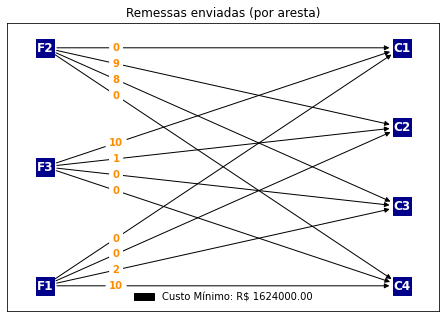

In [ ]:
import matplotlib.pyplot as plt

# Definindo a disposição dos nós do grafo G
posicao = nx.bipartite_layout(
  G,
  nodes=["F1", "F2", "F3"],
    align='vertical'
)

# Desenha o grafo G
nx.draw_networkx(
    G,                       # Grafo original # Título do Grafo
    ax= plt.axes([0,0,1,1]), # Define o eixo de exibição
    pos= posicao,            # Define o layout dos nós
    node_color= 'darkblue',  # Define a cor dos nós como azul escuro
    node_size= 300,          # Define o tamanho dos nós
    node_shape= 's',         # Define o formato dos nós como quadrado
    font_weight= 'bold',     # Coloca negrito no texto dos nomes dos nós
    font_color= 'white'      # Define a cor do texto dos nomes como branco
)

# Criando os rótulos para as arestas do grafo G
rotulos_arestas = nx.draw_networkx_edge_labels(
  G,
  pos= posicao,
  ax= plt.axes([0,0,1,1]),
  edge_labels= {(no1, no2): \
                  fluxos[no1][no2] for no1 in fluxos for no2 in fluxos[no1]}, # List Comprehension para criar um dicionário dos rótulos
  label_pos= 0.8,
  font_color= 'darkorange',
  font_weight= 'bold',
  rotate= False,
  horizontalalignment= 'center',
  verticalalignment= 'center'
)

plt.title('Remessas enviadas (por aresta)')
plt.legend(
  labels=[f'Custo Mínimo: R$ {custo_min:.2f}'],
  loc='lower center',
  framealpha= 0
)

# Exercício

> Uma companhia distribuidora de bebidas tem 2 centros de produção - Araraquara e São José dos Campos - e 3 mercados consumidores principais - São Paulo, Belo Horizonte e Rio de Janeiro. O custo unitário de se transportar uma unidade do produto de cada centro de produção a cada mercado consumidor é dada na tabela a seguir.Nessa tabela, também são apresentadas as demandas de cada mercado e a quantidade máxima disponível do produto em cada centro de produção no próximo período.

<center>

<table>
  <caption>
    <b>Custos unitários dos centros de produção aos mercados consumidores</b>
  </caption>
  <tr align=center>
    <th rowspan=2>Centros de produção</th>
    <th colspan=3>Mercados consumidores</th>
    <th rowspan=2>Suprimento disponível</th>
  </tr>
  <tr align=center>
    <th>São Paulo (3)</th>
    <th>Belo Horizonte (4)</th>
    <th>Rio de Janeiro (5)</th>
  </tr>
  <tr align=center>
    <td>Araraquara (1)</td>
    <td>4</td>
    <td>2</td>
    <td>5</td>
    <td>800</td>
  </tr>
  <tr align=center>
    <td>S. J. Campos (2)</td>
    <td>11</td>
    <td>7</td>
    <td>4</td>
    <td>1000</td>
  </tr>
  <tr align=center>
    <td>Demanda dos mercados</td>
    <td>500</td>
    <td>400</td>
    <td>900</td>
  </tr>
</table>

Fonte: ARENALES, Marcos; ARMENTANO, Vinícius; MORANITO, Reinaldo e YANASSE, Horacio. <b>Pesquisa Operacional para Cursos de Engenharia</b>. 2ª edição. Exemplo 2.3, pág. 22.

</center>

### (a) Resolva pelo Pyomo

In [ ]:
import pyomo.environ as pyo



### (b) Resolva pelo NetworkX

In [ ]:
import networkx as nx



### (c) Plote os grafos, o orignal e a solução como os fluxos nos arcos, com o Matplotlib

In [ ]:
import matplotlib.pyplot as plt

